In [1]:
###################################################################
###################################################################
diff_type = 'add'
corpus = 'mpdd' if diff_type=='del' else 'cejc'

situation = 'apology'
sen_type = 'query'
###################################################################
###################################################################

In [2]:
import re
import csv
import numpy as np
import pandas as pd
from pprint import pprint
from inlp.convert import chinese
import scipy.stats as stats
import matplotlib as plt
import matplotlib.style

fpath = '../sentiment_analysis/CLIWC_Dictionary/cliwc2015 v1.4.3.dic'

category_dict = {}
cliwc = {}
with open(fpath, "r", encoding="utf-8-sig") as f:
    for i,line in enumerate(f):
        line = line.lstrip("\t*")
        line = re.sub(r"\(.+\)","",line)
        line = line.rstrip()
        line = line.replace("\n","").split("\t")
        if (i >= 1) and (i <= 79):
            category_dict.setdefault(line[0],line[1])
        if (i >= 81):
            line[0] = chinese.t2s(line[0]) 
            cliwc.setdefault(line[0],line[1:])
category_dict
cliwc

{'我的': ['1', '2', '3', '4'],
 '我': ['1', '2', '3', '4'],
 '吾': ['1', '2', '3', '4'],
 '俺': ['1', '2', '3', '4'],
 '在下': ['1', '2', '3', '4'],
 '敝人': ['1', '2', '3', '4'],
 '小妹': ['1', '2', '3', '4', '40', '43', '120', '122'],
 '我自己': ['1', '2', '3', '4'],
 '小弟': ['1', '2', '3', '4', '40'],
 '我本人': ['1', '2', '3', '4'],
 '笔者': ['1', '2', '3', '4'],
 '咱们': ['1', '2', '3', '5', '40'],
 '咱': ['1', '2', '3', '5', '40'],
 '吾等': ['1', '2', '3', '5', '40'],
 '我俩': ['1', '2', '3', '5', '40'],
 '我们': ['1', '2', '3', '5', '40', '80', '81'],
 '吾人': ['1', '2', '3', '5', '40'],
 '妳': ['1', '2', '3', '6', '40'],
 '你本人': ['1', '2', '3', '6'],
 '汝': ['1', '2', '3', '6', '40'],
 '您': ['1', '2', '3', '6', '40'],
 '你自己': ['1', '2', '3', '6'],
 '你的': ['1', '2', '3', '6'],
 '祢': ['1', '2', '3', '6', '40'],
 '你': ['1', '2', '3', '6', '40'],
 '您的': ['1', '2', '3', '6', '40'],
 '这位': ['1', '2', '3', '7', '40'],
 '他的': ['1', '2', '3', '7'],
 '她的': ['1', '2', '3', '7'],
 '祂': ['1', '2', '3', '7', '40'],
 '她': ['

In [3]:
def get_cliwc_counts(data):
    freq = np.zeros([len(data),len(category_dict)+1])
    for i , sen in enumerate(data):
        cnt = {}
        for c in category_dict.keys():
            cnt.setdefault(int(c),0)
        for j, w in enumerate(sen): 
            if w in cliwc:
                for key in cliwc[w]:
                    cnt[int(key)]+=1
            # Bigram
            if j>=1:
                w = sen[j-1]+sen[j]
                if w in cliwc:
                    for key in cliwc[w]:
                        cnt[int(key)]+=1
            # Trigram
            if j>=2:
                w = sen[j-2]+sen[j-1]+sen[j]
                if w in cliwc:
                    for key in cliwc[w]:
                        cnt[int(key)]+=1
            # quadgram
            if j>=3:
                w = sen[j-3]+sen[j-2]+sen[j-1]+sen[j]
                if w in cliwc:
                    for key in cliwc[w]:
                        cnt[int(key)]+=1 
        tmp=[len(sen)]
        tmp.extend([cnt[x] for x in cnt.keys()])
        freq[i] = tmp
    freq_df = pd.DataFrame(freq)
    
    col_name = ["length"]
    category_name = list([x for x in category_dict.values()])
    col_name.extend(category_name)
    freq_df = freq_df.set_axis(col_name,axis=1)
    return freq_df

def get_mrph_data(corpus, situation, method, sen_type):
    data = []
    path = f'../mrphdata/{corpus}/{situation}/{method}_{sen_type}'
    with open(path ,'r',encoding='utf-8')as f:
        reader = csv.reader(f)
        for row in reader:
            row = row[0].replace('\ufeff','').split(' ')
            data.append(row)
    return(data)

method = 'rewrited'
rewrited = get_mrph_data(corpus, situation, method, sen_type)
rewrited_freq = get_cliwc_counts(rewrited)
print(rewrited_freq[:100])
print()
method = 'translated'
translated = get_mrph_data(corpus, situation, method, sen_type)
translated_freq = get_cliwc_counts(translated)
print(translated_freq.columns[1:].to_list())



    length  function  pronoun  ppron    i   we  you  shehe  they  youpl  ...  \
0     18.0       8.0      1.0    1.0  1.0  0.0  0.0    0.0   0.0    0.0  ...   
1      5.0       2.0      1.0    0.0  0.0  0.0  0.0    0.0   0.0    0.0  ...   
2      1.0       0.0      0.0    0.0  0.0  0.0  0.0    0.0   0.0    0.0  ...   
3      4.0       2.0      0.0    0.0  0.0  0.0  0.0    0.0   0.0    0.0  ...   
4      6.0       3.0      1.0    1.0  0.0  0.0  1.0    0.0   0.0    0.0  ...   
..     ...       ...      ...    ...  ...  ...  ...    ...   ...    ...  ...   
95    14.0       8.0      2.0    1.0  1.0  0.0  0.0    0.0   0.0    0.0  ...   
96    14.0       8.0      3.0    3.0  1.0  0.0  2.0    0.0   0.0    0.0  ...   
97     7.0       3.0      1.0    0.0  0.0  0.0  0.0    0.0   0.0    0.0  ...   
98     7.0       3.0      1.0    1.0  1.0  0.0  0.0    0.0   0.0    0.0  ...   
99    13.0       8.0      2.0    2.0  1.0  0.0  1.0    0.0   0.0    0.0  ...   

    home  money  relig  death  informal

# 欲しい列だけ残してfreqを可視化

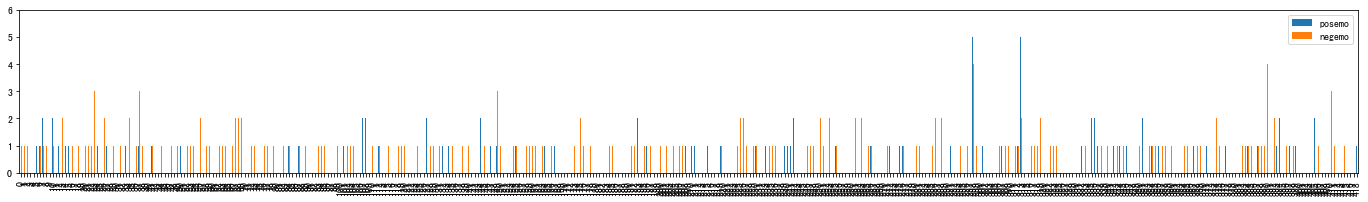

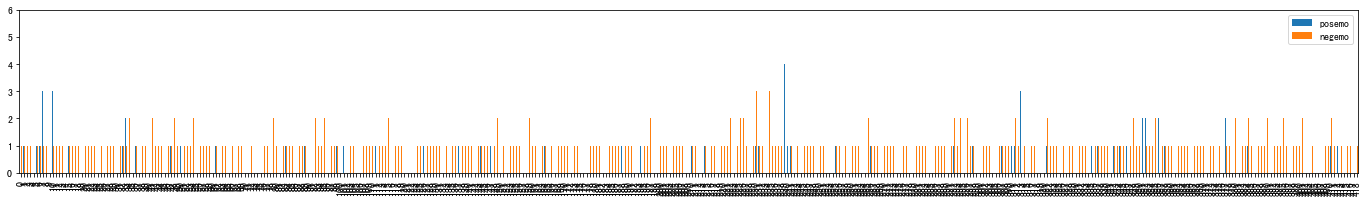

In [4]:
use_cols = ["posemo","negemo"]
rewrited_freq_ = rewrited_freq[use_cols]
translated_freq_ = translated_freq[use_cols]
rewrited_freq_.plot(figsize=(24, 3),kind='bar',ylim=(0,6))
translated_freq_.plot(figsize=(24, 3),kind='bar',ylim=(0,6))

# 最も高いemotionをその文のemotionとしてみると。。。？

In [5]:
emos = ["posemo","negemo"]
rewrited_emos=rewrited_freq_.idxmax(axis=1).to_list()
translated_emos=translated_freq_.idxmax(axis=1).to_list()
same_emo_idx = []
diff_emo_idx = []
for i,(r,t) in enumerate(zip(rewrited_emos,translated_emos)):
    if r==t:
        same_emo_idx.append([i,t,r])
    else:
        diff_emo_idx.append([i,t,r])
print('total_count: {}, same: {}, diff: {}'.format(len(rewrited_emos),len(same_emo_idx),len(diff_emo_idx)))
print()
for i,(r,t) in enumerate(zip(rewrited_emos,translated_emos)):
    if r!=t:
        print('MT: {0:<10}  {1}'.format(t,''.join(translated[i])))
        print('HT: {0:<10}  {1}'.format(r,''.join(rewrited[i])))
        print()
#     print('MT: {0:<10}  {1}'.format(t,''.join(translated[i])))
#     print('HT: {0:<10}  {1}'.format(r,''.join(rewrited[i])))
#     print()
print(rewrited_emos)
emo_matrics = pd.DataFrame(np.zeros([2,2]))
emo_matrics = emo_matrics.set_axis(emos,axis=0)
emo_matrics = emo_matrics.set_axis(emos,axis=1)#.add_prefix("HT_")
for r,t in zip(rewrited_emos,translated_emos):
    emo_matrics.at[t,r]+=1
emo_matrics.loc['Total'] = emo_matrics.sum(numeric_only=True)
emo_matrics.loc[:,'Total'] = emo_matrics.sum(numeric_only=True,axis=1)
emo_matrics=emo_matrics.T.add_prefix("MT_").T
emo_matrics=emo_matrics.add_prefix("HT_")

import os

os.makedirs('for_thesis/LIWC/',exist_ok=True)
emo_matrics.to_csv(f'for_thesis/LIWC/CLIWC_sentence_comparison_{situation}_{sen_type}_{diff_type}.csv',encoding='utf-8-sig')
emo_matrics

total_count: 419, same: 228, diff: 191

MT: posemo      是这样吗？。是啊。。抱歉。好吧，我知道了
HT: negemo      这样啊？抱歉...

MT: negemo      是的，我知道。它是如此之紧。。啊。。我要了。对不起，我不知道
HT: posemo      真的很不好意思。

MT: negemo      是的，它是。。对不起，我不知道。我很抱歉，但是...。求你了
HT: posemo      不好意思给你添麻烦了。

MT: posemo      是的，我知道。啊。。我可以吗？。对不起，我不知道
HT: negemo      不好意思，那就麻烦你。

MT: negemo      啊。。抱歉。如果已经+了，我就会接受。
HT: posemo      不好意思，我已经有一个饭团了。

MT: negemo      抱歉
HT: posemo      不好意思，可以请你再说一遍吗？

MT: negemo      是啊。。是啊。。But+there+is+something+about+national+speak+that+if+you+look+at+it。。啊。。抱歉。我只是在想，当我们谈论......。额外+额外，对吧？。用"错"字来形容也不为过吧。
HT: posemo      嗯...但是如果从国文的角度切入的话，你看嘛...啊，抱歉，我刚刚讲到一半才想到的。听起来可能有点像废话，但是当我们把心情或是风景记录下来的时候，真的有像考试一样有所谓的「正解」吗？

MT: negemo      是的，我知道。啊。。抱歉
HT: posemo      不好意思，我知道了。

MT: negemo      啊。。很抱歉，我的只有这个顺序。
HT: posemo      很抱歉，我没有把这边整理好。

MT: negemo      对不起，我不知道。对不起，让你久等了。
HT: posemo      对不起，让你久等了。

MT: posemo      对不起+对不起。
HT: negemo      抱歉抱歉。

MT: negemo      这是一个dake，我很抱歉。。一口。
HT: posemo      不好意思，可以给我喝一口吗？

MT: n

,HT_posemo,HT_negemo,HT_Total
MT_posemo,84.0,33.0,117.0
MT_negemo,158.0,144.0,302.0
MT_Total,242.0,177.0,419.0


# 正規分布かどうかチェック

In [6]:
# Norm by the length of sentence
rewrited_norm = rewrited_freq.iloc[:,1:].T/rewrited_freq.iloc[:,0]
rewrited_norm = rewrited_norm.T
translated_norm = translated_freq.iloc[:,1:].T/translated_freq.iloc[:,0]
translated_norm = translated_norm.T
def check_norm_dist(val):
    if val < 0.05:
        return 'NOT normal dist'
    else:
        return 'normal dist'

categories=translated_norm.columns.to_list()

for category in categories:
    print("=== translated ===")
    p = stats.shapiro(translated_norm[category].to_list())[1]
    print('{0:<10}: shapiro  p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    p = stats.kstest(translated_norm[category].to_list(),"norm")[1]
    print('{0:<10}: k-s test p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    
    print("=== rewrited ===")
    p = stats.shapiro(rewrited_norm[category].to_list())[1]
    print('{0:<10}: shapiro   p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    p = stats.kstest(rewrited_norm[category].to_list(),"norm")[1]
    print('{0:<10}: k-s test  p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    print()

=== translated ===
function  : shapiro  p value 1.455477465574272e-15            NOT normal dist
function  : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
function  : shapiro   p value 2.940318005891472e-14            NOT normal dist
function  : k-s test  p value 2.1841929874520559e-97           NOT normal dist

=== translated ===
pronoun   : shapiro  p value 3.810760572115629e-13            NOT normal dist
pronoun   : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
pronoun   : shapiro   p value 1.3237395124128713e-18           NOT normal dist
pronoun   : k-s test  p value 2.1841929874520559e-97           NOT normal dist

=== translated ===
ppron     : shapiro  p value 1.5659716429941746e-14           NOT normal dist
ppron     : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
ppron     : shapiro   p value 7.984722855160287e-22            NOT normal dist
ppron     : k-s test  p val

/home/yamashita/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# 二つに有意な差があるかどうかチェック

In [7]:
def check_diff(val):
    if val < 0.05:
        return 'The diff value btw MT and HT is statisticaly signigicant'
    return 'NO diff'

has_diff_idx = []
for category in categories:
#     "pratt":差が0である場合を許す検定
    if np.all(np.array(rewrited_norm[category].to_list()) - np.array(translated_norm[category].to_list())==0):
        print('{} {}'.format(category, "all x-y = 0"))
    else:
        p1 = stats.wilcoxon(rewrited_norm[category],translated_norm[category],zero_method='pratt',correction=True)[1]
        print('{0:<10}: wilcoxon p value "pratt"          {1:25}  {2}'.format(category, p1, check_diff(p1)))

    #     "wilcox":差が0である場合を無視する検定
        p2 = stats.wilcoxon(rewrited_norm[category],translated_norm[category],zero_method='wilcox',correction=True)[1]
        print('{0:<10}: wilcoxon p value "wilcox"         {1:25}  {2}'.format(category, p2, check_diff(p2)))
    #     alternative=’greater’を指定することにより片側検定の結果
    #     p = stats.wilcoxon(rewrited_freq_[i],translated_freq_[i],zero_method='wilcox',alternative='greater',correction=True)[1]
    #     print('{0:<10}: wilcoxon p value "wilcox-greater" {1:25}  {2}'.format(emo, p, check_diff(p)))
        print()
        if (check_diff(p1) or check_diff(p2)) != 'NO diff':
            has_diff_idx.append(category) 
print(has_diff_idx)

function  : wilcoxon p value "pratt"                0.04675348021972363  The diff value btw MT and HT is statisticaly signigicant
function  : wilcoxon p value "wilcox"               0.02864631094890546  The diff value btw MT and HT is statisticaly signigicant

pronoun   : wilcoxon p value "pratt"              6.894595858823769e-19  The diff value btw MT and HT is statisticaly signigicant
pronoun   : wilcoxon p value "wilcox"              8.08094879951335e-19  The diff value btw MT and HT is statisticaly signigicant

ppron     : wilcoxon p value "pratt"             3.3996873279514376e-25  The diff value btw MT and HT is statisticaly signigicant
ppron     : wilcoxon p value "wilcox"             1.738371765361302e-24  The diff value btw MT and HT is statisticaly signigicant

i         : wilcoxon p value "pratt"             4.5577494909483176e-35  The diff value btw MT and HT is statisticaly signigicant
i         : wilcoxon p value "wilcox"            1.9963982958462817e-33  The diff value

/home/yamashita/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Unaligned words だけで上記と同様に　有意に差がある　かどうかを確かめる

In [8]:
def get_data_as_list(fpath) -> list:
    data = []
    with open(fpath, "r", encoding="utf-8-sig") as f:
        for line in f:
            line = line.replace("\n","").split(" ")
            data.append(line)
    return data

def get_unaligned_mrphwords(unaligned_index,mrph):
    unaligned_mrphwords = []
    for i, index in enumerate(unaligned_index):
        tmp = []
        for indice in index:
            if indice == "":
                continue
            try:
                tmp.append(mrph[int(i)][int(indice)])
            except:
                print('index: ',index)
                print('indice: ',indice)
                print('len(mrph[int(i)]): ',len(mrph[int(i)]))
                print(mrph[int(i)])
        unaligned_mrphwords.append(tmp)
    return unaligned_mrphwords

method = 'rewrited'

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
mrph = get_data_as_list(mrph_fpath)
rewrited_unaligned = get_unaligned_mrphwords(unaligned_index,mrph)

method = 'translated'  

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
mrph = get_data_as_list(mrph_fpath)
translated_unaligned = get_unaligned_mrphwords(unaligned_index,mrph)

rewrited_unaligned_freq = get_cliwc_counts(rewrited_unaligned)
translated_unaligned_freq = get_cliwc_counts(translated_unaligned)
# print(rewrited_mrph[:5])
# print(translated_mrph[:5])
print(rewrited_unaligned_freq.columns)
print()
print(translated_unaligned_freq.columns)

Index(['length', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe',
       'they', 'youpl', 'ipron', 'prep', 'auxverb', 'adverb', 'conj', 'negate',
       'quanunit', 'prepend', 'specart', 'particle', 'modal_pa', 'general_pa',
       'compare', 'interrog', 'number', 'quant', 'tensem', 'focuspast',
       'focuspresent', 'focusfuture', 'progm', 'affect', 'posemo', 'negemo',
       'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male',
       'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ',
       'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual',
       'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk',
       'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home',
       'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler'],
      dtype='object')

Index(['length', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe',
       'they', 'youpl', 'i

# 欲しい列だけ残してfreqを可視化

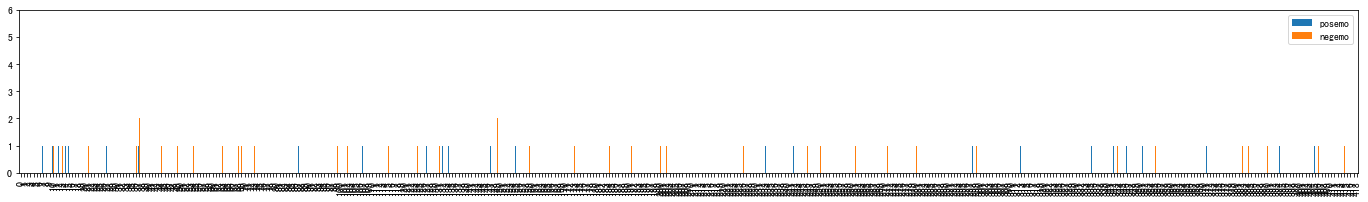

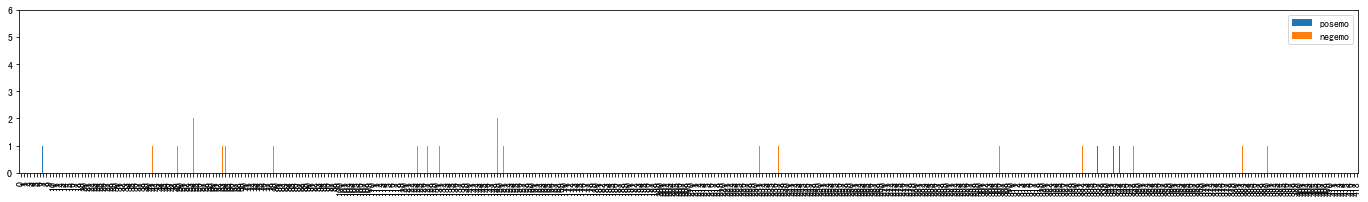

In [9]:
use_cols = ["posemo","negemo"]
rewrited_unaligned_freq_ = rewrited_unaligned_freq[use_cols]
translated_unaligned_freq_ = translated_unaligned_freq[use_cols]
rewrited_unaligned_freq_.plot(figsize=(24, 3),kind='bar',ylim=(0,6))
translated_unaligned_freq_.plot(figsize=(24, 3),kind='bar',ylim=(0,6))

In [10]:
# Norm by the length of sentence
rewrited_unaligned_norm = rewrited_unaligned_freq.iloc[:,1:].T/rewrited_unaligned_freq.iloc[:,0]
rewrited_unaligned_norm = rewrited_unaligned_norm.T
translated_unaligned_norm = translated_unaligned_freq.iloc[:,1:].T/translated_unaligned_freq.iloc[:,0]
translated_unaligned_norm = translated_unaligned_norm.T
def check_norm_dist(val):
    if val < 0.05:
        return 'NOT normal dist'
    else:
        return 'normal dist'

categories=translated_unaligned_norm.columns.to_list()

for category in categories:
    print("=== translated ===")
    p = stats.shapiro(translated_unaligned_norm[category].to_list())[1]
    print('{0:<10}: shapiro  p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    p = stats.kstest(translated_unaligned_norm[category].to_list(),"norm")[1]
    print('{0:<10}: k-s test p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    
    print("=== rewrited ===")
    p = stats.shapiro(rewrited_unaligned_norm[category].to_list())[1]
    print('{0:<10}: shapiro   p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    p = stats.kstest(rewrited_unaligned_norm[category].to_list(),"norm")[1]
    print('{0:<10}: k-s test  p value {1:<30}   {2}'.format(category, p, check_norm_dist(p)))
    print()

=== translated ===
function  : shapiro  p value 1.0                              normal dist
function  : k-s test p value nan                              normal dist
=== rewrited ===
function  : shapiro   p value 1.0                              normal dist
function  : k-s test  p value nan                              normal dist

=== translated ===
pronoun   : shapiro  p value 1.0                              normal dist
pronoun   : k-s test p value nan                              normal dist
=== rewrited ===
pronoun   : shapiro   p value 1.0                              normal dist
pronoun   : k-s test  p value nan                              normal dist

=== translated ===
ppron     : shapiro  p value 1.0                              normal dist
ppron     : k-s test p value nan                              normal dist
=== rewrited ===
ppron     : shapiro   p value 1.0                              normal dist
ppron     : k-s test  p value nan                              normal d

In [11]:
def check_diff(val):
    if val < 0.05:
        return 'The diff value btw MT and HT is statisticaly signigicant'
    return 'NO diff'

has_diff_idx_unaligned = []
for category in categories:
#     "pratt":差が0である場合を許す検定
    if np.all(np.array(rewrited_unaligned_norm[category].to_list()) - np.array(translated_unaligned_norm[category].to_list())==0):
        print('{} {}'.format(category, "all x-y = 0"))
    else:
        p1 = stats.wilcoxon(rewrited_unaligned_norm[category],translated_unaligned_norm[category],zero_method='pratt',correction=True)[1]
        print('{0:<10}: wilcoxon p value "pratt"          {1:25}  {2}'.format(category, p1, check_diff(p1)))

    #     "wilcox":差が0である場合を無視する検定
        p2 = stats.wilcoxon(rewrited_unaligned_norm[category],translated_unaligned_norm[category],zero_method='wilcox',correction=True)[1]
        print('{0:<10}: wilcoxon p value "wilcox"         {1:25}  {2}'.format(category, p2, check_diff(p2)))
    #     alternative=’greater’を指定することにより片側検定の結果
    #     p = stats.wilcoxon(rewrited_freq_[i],translated_freq_[i],zero_method='wilcox',alternative='greater',correction=True)[1]
    #     print('{0:<10}: wilcoxon p value "wilcox-greater" {1:25}  {2}'.format(emo, p, check_diff(p)))
        print()
        if (check_diff(p1) or check_diff(p2)) != 'NO diff':
            has_diff_idx_unaligned.append(category) 
print(has_diff_idx_unaligned)

function  : wilcoxon p value "pratt"              6.144520531623611e-29  The diff value btw MT and HT is statisticaly signigicant
function  : wilcoxon p value "wilcox"            1.4507087317735332e-30  The diff value btw MT and HT is statisticaly signigicant

pronoun   : wilcoxon p value "pratt"              1.924261274618225e-56  The diff value btw MT and HT is statisticaly signigicant
pronoun   : wilcoxon p value "wilcox"             5.440339459014397e-54  The diff value btw MT and HT is statisticaly signigicant

ppron     : wilcoxon p value "pratt"              7.720338096585374e-57  The diff value btw MT and HT is statisticaly signigicant
ppron     : wilcoxon p value "wilcox"            1.0415832193649658e-54  The diff value btw MT and HT is statisticaly signigicant

i         : wilcoxon p value "pratt"              7.515717275918261e-59  The diff value btw MT and HT is statisticaly signigicant
i         : wilcoxon p value "wilcox"             5.880189268391263e-56  The diff value

# 原文と　Unaligned 共通して　有意に差がある　emotion　は？

In [12]:
both_significant = []
for unaligend_idx in has_diff_idx_unaligned:
    for idx in has_diff_idx:
        if unaligend_idx == idx:
            both_significant.append(unaligend_idx)
#             print('{}'.format(unaligend_idx))
print(', '.join(both_significant))

function, pronoun, ppron, i, you, conj, negate, particle, modal_pa, general_pa, compare, tensem, focuspast, focuspresent, focusfuture, progm, affect, posemo, negemo, anger, social, insight, cause, discrep, tentat, certain, differ, percept, hear, bio, ingest, power, reward, risk, relativ, motion, time, leisure, informal, assent, nonflu, filler


# 両方に　有意に差がある　emotion　は以下。
上記、複数回実行した際のまとめ

|diff type|corpus|sen type|situation|category|emotion|
|---|---|---|---|---|---|
|del|mpdd|query|apology|social, female||
|del|mpdd|query|request|ppron, i, adverb, affect, negemo, anger, tentat, affiliation, space, time, leisure, relig|affect, negemo, anger|
|del|mpdd|query|thanksgiving|tensem, percept, hear, feel, drives, informal, netspeak||
|del|mpdd|res|apology|ppron, focuspast, affect, cogproc, hear||
|del|mpdd|res|request|prep, auxverb, quanunit, cogproc, insight, discrep, body, drives, affiliation, achieve, time, home||
|del|mpdd|res|thanksgiving|prepend, focuspresent, affect, health|affect|
|add|cejc|query|apology|function, pronoun, ppron, i, you, conj, negate, particle, modal_pa, general_pa, compare, tensem, focuspast, focuspresent, focusfuture, progm, affect, posemo, negemo, anger, social, insight, cause, discrep, tentat, certain, differ, percept, hear, bio, ingest, power, reward, risk, relativ, motion, time, leisure, informal, assent, nonflu, filler|affect, posemo, negemo, anger|
|add|cejc|query|request|pronoun, ppron, i, adverb, prepend, modal_pa, compare, number, focuspresent, affect, negemo, family, discrep, tentat, power, risk, relativ, time, informal, nonflu, filler|affect, negemo|
|add|cejc|query|thanksgiving|function, pronoun, ppron, i, you, ipron, prep, auxverb, adverb, conj, quanunit, specart, particle, modal_pa, compare, quant, tensem, progm, social, family, male, cogproc, cause, discrep, tentat, certain, drives, affiliation, reward, risk, relativ, time, money, informal, netspeak, assent, nonflu, filler||
|add|cejc|res|apology|function, pronoun, ppron, i, auxverb, adverb, negate, particle, modal_pa, compare, tensem, focuspast, progm, negemo, family, cogproc, discrep, tentat, certain, percept, hear, bio, ingest, affiliation, reward, relativ, time, leisure, informal, assent, filler|negemo|
|add|cejc|res|request|function, pronoun, ppron, i, shehe, auxverb, adverb, prepend, particle, modal_pa, affect, posemo, family, cogproc, insight, percept, hear, drives, reward, work, informal, assent, nonflu, filler|affect, posemo|
|add|cejc|res|thanksgiving|pronoun, ppron, i, we, adverb, negate, quanunit, particle, modal_pa, general_pa, compare, quant, tensem, focuspast, progm, family, male, cogproc, insight, cause, discrep, percept, hear, affiliation, risk, relativ, time, work, informal, assent, nonflu, filler|

---
# 有意に差があるemotion かつ unalignedの単語を抽出する

In [13]:
###################################################################
###################################################################
diff_type = 'del'
corpus = 'mpdd' if diff_type=='del' else 'cejc'

situation = 'request'
sen_type = 'query'
# 30	affect (Affect)
# 	31	posemo (Positive Emotions)
# 	32	negemo (Negative Emotions)
# 		33	anx (Anx)
# 		34	anger (Anger)
# 		35	sad (Sad)
emotion = 'negemo'

# stop_words=["の","に","こと","",""]
stop_words=[]
###################################################################
###################################################################
# の：Joy
# に：Disgust
# こと：Sadness

In [14]:
def extract_words_by_emotion(unaligned, emotion, stop_words):
    emo_words = []
    for i , sen in enumerate(unaligned):
        tmp = []
        for j, w in enumerate(sen): 
            if w not in stop_words:
                if w in cliwc:
                    for key in cliwc[w]:
                        if category_dict[key] == emotion:
                            tmp.append(w)
                # Bigram
                if j>=1:
                    w = sen[j-1]+sen[j]
                    if w in cliwc:
                        for key in cliwc[w]:
                            if category_dict[key] == emotion:
                                tmp.append(w)
                # Trigram
                if j>=2:
                    w = sen[j-2]+sen[j-1]+sen[j]
                    if w in cliwc:
                        for key in cliwc[w]:
                            if category_dict[key] == emotion:
                                tmp.append(w)
                # quadgram
                if j>=3:
                    w = sen[j-3]+sen[j-2]+sen[j-1]+sen[j]
                    if w in cliwc:
                        for key in cliwc[w]:
                            if category_dict[key] == emotion:
                                tmp.append(w)
        emo_words.append(tmp)
    return emo_words   

method = 'rewrited'

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
rewrited_mrph = get_data_as_list(mrph_fpath)
rewrited_unaligned = get_unaligned_mrphwords(unaligned_index,rewrited_mrph)


method = 'translated'  

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
translated_mrph = get_data_as_list(mrph_fpath)
translated_unaligned = get_unaligned_mrphwords(unaligned_index,translated_mrph)
# print(rewrited_mrph[:5])
# print(translated_mrph[:5])

In [15]:
translated_emo_words = extract_words_by_emotion(translated_unaligned,emotion,stop_words)
# translated_emo_words

In [16]:
rewrited_emo_words = extract_words_by_emotion(rewrited_unaligned,emotion,stop_words)
# rewrited_emo_words

In [17]:
index = []
for i in range(len(rewrited_emo_words)):
    if (translated_emo_words[i]!=[]) or (rewrited_emo_words[i]!=[]):
        index.append(i)
        print('{0:<5} MT: {1:<50} HT: {2:<50}'.format(i,' '.join(translated_emo_words[i]),' '.join(rewrited_emo_words[i])))

4     MT:                                                    HT: 抱歉                                                
6     MT:                                                    HT: 批评                                                
8     MT: 不 麻烦                                               HT: 麻烦                                                
13    MT:                                                    HT: 难题                                                
15    MT: 不 严肃                                               HT: 不 严肃 批评                                           
16    MT: 不                                                  HT:                                                   
18    MT: 不 不要 干                                             HT: 不要 干                                              
19    MT: 混乱                                                 HT:                                                   
26    MT: 不要                                                 HT: 不要 伤   

In [18]:
if diff_type =='add':
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
    original_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
    rewrited_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
    translated_mrph = get_data_as_list(mrph_fpath)
elif diff_type == 'del':
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
    original_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
    rewrited_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
    translated_mrph = get_data_as_list(mrph_fpath)
for i in index:
    print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
    print('      MT: {}'.format(''.join(translated_mrph[i])))
    print('      MT:{}'.format(' '.join(translated_emo_words[i])))
    print('      HT: {}'.format(''.join(rewrited_mrph[i])))
    print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
    print()

4     OR: 同学们，很抱歉！今天家里有点事迟来了一步。下面请翻开课本45页。我们再来学习一篇新的课文。
      MT: クラスの皆さん、ごめんなさい！今日は家族の用事で少し遅れてしまいました。次は教科書の45ページをめくってください。新しいテキストを覚えよう
      MT:
      HT: みなさんごめんなさい！今日は家で少し用事があって、ちょっと遅れてしまいました。じゃあ教科書の45ページを開いてください。新しいパートに入りましょう。
      HT:抱歉

6     OR: 孙校长，就拜讬了，你要给他严厉地批评批评啊！使他心服口服。
      MT: サン校長さん、ただただ、厳しい批判をしてあげてください!説得力を持たせる。
      MT:
      HT: よろしくお願いします。厳しく叱って、よくよくわからせてやってください。
      HT:批评

8     OR: 左老师在家吗？我虎子有道数学题不懂，麻烦你今天晚上来我家一趟给他辅导下有时间吗？
      MT: ズオさんはいますか？虎が数学の問題をやっているのですが、今夜私の家に来て家庭教師をしてあげてください。時間はありますか？
      MT:不 麻烦
      HT: 先生、いらっしゃいますか？うちの子が数学がわからないというので、済みませんけど今晩来ていただけませんでしょうか。
      HT:麻烦

13    OR: 丽华，请你讲话文明点好不好，我俩是在讨论一道数学难题！你知道吗！
      MT: 李華、礼節をわきまえてください、算数の問題を議論しているんですよ!何を知ってるんだ！
      MT:
      HT: 今むずかしい数学の問題を解いてるんだよ。見ればわかるだろ？後にしてくれ。
      HT:难题

15    OR: 向书记，我在平日工作中有哪些做得不对，请您严肃批评、指正，我虚心接受，坚决改正!
      MT: 秘書に、私は私の定期的な仕事で間違ったことをしている、深刻な批判、修正をしてください、私は謙虚に受け入れ、断固として修正してください
      MT:不 严肃
      HT: 書記、もし仕事上で至らないところがあれば、是非厳しくご指摘ください。虚心坦懐に受け止め、必ず改善いたします！
      HT:不

In [19]:
search_word = '不'

print('========= MT =========')
cnt = 0
for i in index:
    if (search_word in translated_emo_words[i]) and (search_word not in rewrited_emo_words[i]):
        print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
        print('      MT: {}'.format(''.join(translated_mrph[i])))
        print('      MT:{}'.format(' '.join(translated_emo_words[i])))
        print('      HT: {}'.format(''.join(rewrited_mrph[i])))
        print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
        print()
        cnt+=1
print('cnt = {}'.format(cnt))
print()
print('========= HT =========')
cnt = 0
for i in index:
    if (search_word in rewrited_emo_words[i]) and (search_word not in translated_emo_words[i]):
        print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
        print('      MT: {}'.format(''.join(translated_mrph[i])))
        print('      MT:{}'.format(' '.join(translated_emo_words[i])))
        print('      HT: {}'.format(''.join(rewrited_mrph[i])))
        print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
        print()
        cnt+=1
print('cnt = {}'.format(cnt))
print()
print('========= MT,HT =========')
cnt = 0
for i in index:
    if (search_word in rewrited_emo_words[i]) and (search_word in translated_emo_words[i]):
        print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
        print('      MT: {}'.format(''.join(translated_mrph[i])))
        print('      MT:{}'.format(' '.join(translated_emo_words[i])))
        print('      HT: {}'.format(''.join(rewrited_mrph[i])))
        print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
        print()
        cnt+=1
print('cnt = {}'.format(cnt))

========= MT =========
8     OR: 左老师在家吗？我虎子有道数学题不懂，麻烦你今天晚上来我家一趟给他辅导下有时间吗？
      MT: ズオさんはいますか？虎が数学の問題をやっているのですが、今夜私の家に来て家庭教師をしてあげてください。時間はありますか？
      MT:不 麻烦
      HT: 先生、いらっしゃいますか？うちの子が数学がわからないというので、済みませんけど今晩来ていただけませんでしょうか。
      HT:麻烦

16    OR: 向书记，我是有妻之夫，再说，我是人民教师，怎么会做出你说出的那种事来呢？请你尊重事实，调查清楚后再批评我不迟！
      MT: 翔書記、私は既婚者です、しかも私は人民の教師です、あなたが言ったことをどうすればいいのでしょうか？批判する前に事実を尊重して、はっきりと調査してから批判してください
      MT:不
      HT: 書記、私には妻がいます。しかも、私は人民のために働く教師ですよ。そんなことするわけがありません。お願いします、ご批判は事実関係を確かめてからにしてください。
      HT:

18    OR: 你如果真的这样做了，就是你不对了，你想到没有，你要“菩萨”就请“菩萨”，不要“菩萨”就撤“菩萨”，你觉得对得住正鹏哥吗？再说他也是在为我们国家培养人才呀。你对正鹏哥这样不许他去做，那样也不让他去干，你这不是在埋没别人的前途，你是在犯罪，你知道吗？
      MT: もしそうなら、それは間違っている、考えたか？菩薩が欲しければ、菩薩を求め、欲しくなければ、菩薩を取り下げる。鄭鵬兄さんは正しいと思いますか？その上、彼は我が国のために人材を育成している。人の未来を埋めるんじゃなくて犯罪を犯しているんだぞ？
      MT:不 不要 干
      HT: 昔助けてくれた人に、そんな態度をとるのはよくないんじゃないの？左さんは国のための人材を育ててるんだし、こんな風に未来を奪うのはよくないよ。
      HT:不要 干

76    OR: 哎呀，这个请你放心，我是绝对不会的，你也不想想，我家里还躺着瘫痪的妻子，我能做出那种绝情的事情来吗？
      MT: 考えなくていいよ、家には半身不随の妻がいるんだから、そんな必死なことしていいのか？
   

# For to csv¶
unaligned_emotion_word in MT は考慮にいれない 理由 MTでunalignedのケースは、翻訳ミスか、Gizaミスのどちらかであり、 異文化差異はあらわれない。 ※もし、MTが異文化差異を考慮できていた場合のケースは、HTMTに現れる。

In [20]:
def save_table(path,table):
    with open(path, 'w', encoding='utf_8_sig')as f:
        writer = csv.writer(f)
        writer.writerows(table)
        
import itertools

In [21]:
sig_list=[['del',	'mpdd',	'query',	'request',		'affect'],
            ['del',	'mpdd',	'query',	'request',		'negemo'],
            ['del',	'mpdd',	'query',	'request',		'anger'],
            ['del',	'mpdd',	'res',	'thanksgiving',	'affect'],
            ['add',	'cejc',	'query',	'apology',	    'affect'],
            ['add',	'cejc',	'query',	'apology',	    'posemo'],
            ['add',	'cejc',	'query',	'apology',	    'negemo'],
            ['add',	'cejc',	'query',	'apology',	    'anger'],
            ['add',	'cejc',	'query',	'request',	    'negemo'],
            ['add',	'cejc',	'res',	'request',	    'affect'],
            ['add',	'cejc',	'res',	'request',	    'posemo']]

table = []
segments =    ['labelmiss', 'gizamiss','headact','adjunct','other','response']
effects =     ['norequest','noapology','nothanks','noeffect','effect']
directness =  ['moredirect','lessdirect']
intencity =   ['moredowngrader','lessdowngrader',
               'moreupgrader','lessupgrader',
               'morespecific','lessspecific',
               'morerespectful','lessrespectful',
               'morehumble','lesshumble',
               'add_expect_sth_in_return','rmv_expect_sth_in_return',
               'add_irony','rmv_irony']
perspectives = ['speaker_oriented','listener_oriented','speaker_listener_oriented','impersonal_oriented']

save_path = 'CLIWC_diff_reason_table.csv'
with open(save_path, 'r', encoding='utf_8_sig')as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        table.append(row)
#         if row[8] not in reasons:
#             reasons.append(row[8])

table_cnt = len(table)
print('table_cnt: ',table_cnt)

cnt = 0
for s in sig_list:  
###################################################################
###################################################################
    diff_type = s[0]
    corpus = 'mpdd' if diff_type=='del' else 'cejc'

    situation = s[3]
    sen_type = s[2]
    emotion = s[4]

#     stop_words=["の","に","こと","",""]
    stop_words=[]
###################################################################
###################################################################

    method = 'rewrited'

    unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
    ref_method='original' if diff_type=='del' else method
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
    unaligned_index = get_data_as_list(unaligned_index_fpath)
    rewrited_mrph = get_data_as_list(mrph_fpath)
    rewrited_unaligned = get_unaligned_mrphwords(unaligned_index,rewrited_mrph)


    method = 'translated'  

    unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
    ref_method='original' if diff_type=='del' else method
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
    unaligned_index = get_data_as_list(unaligned_index_fpath)
    translated_mrph = get_data_as_list(mrph_fpath)
    translated_unaligned = get_unaligned_mrphwords(unaligned_index,translated_mrph)   

    translated_emo_words = extract_words_by_emotion(translated_unaligned,emotion,stop_words)
    rewrited_emo_words = extract_words_by_emotion(rewrited_unaligned,emotion,stop_words)

    # HTのみ
    emoword_set = sorted(list(set(itertools.chain.from_iterable(rewrited_emo_words))))
    index = []
    for i in range(len(rewrited_emo_words)):
        if rewrited_emo_words[i]!=[]:
            index.append(i)
            
    if diff_type =='add':
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
        original_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
        rewrited_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
        translated_mrph = get_data_as_list(mrph_fpath)
    elif diff_type == 'del':
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
        original_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
        rewrited_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
        translated_mrph = get_data_as_list(mrph_fpath)

    for search_word in emoword_set:
        print('========= HT =========')
        for i in index:
            if (search_word in rewrited_emo_words[i]) and (search_word not in translated_emo_words[i]):
                print()
                print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
                print('      MT: {}'.format(''.join(translated_mrph[i])))
                print('      MT:{}'.format(' '.join(translated_emo_words[i])))
                print('      HT: {}'.format(''.join(rewrited_mrph[i])))
                print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
                print()
                print('search_word: {}, count: {}, situation: {}, emotion: {}, diff_type: {},sen_type: {}'.format(search_word, cnt, situation, emotion, diff_type,sen_type))
                print('segments: {}'.format(segments))
                if cnt < table_cnt:
                    print('segment: {}, effect: {}'.format(table[cnt][8],table[cnt][9]))
                    cnt+=1
                    pass
                else:
                    ##### check 上位カテゴリ#####
                    check = False
                    for t in table:
                        if (diff_type==t[0]) and (corpus==t[1]) and (situation==t[2]) and (sen_type==t[3]) and (search_word==t[5]) and (i==int(t[7])):
                            segment = t[8]
                            effect = t[9]
                            direct = t[10]
                            intence = t[11]
                            perspective = t[12]
                            check = True
                            break
                    if check==False:
                        segment = input("which segments ? >> ")
                        if segment in ['headact','adjunct','other','response']:
                            print('effects: {}'.format(effects))
                            effect = input("which effect ? >> ")
                            if effect == 'effect':
                                print('directness: {}'.format(directness))
                                direct = input("more/less direct ? >> ")
                                print('intencity: {}'.format(intencity))
                                intence = input("more/less intencity ? >> ")
                                print('perspectives: {}'.format(perspectives))
                                perspective = input("more/less perspective ? >> ")
                            else:
                                direct = ""
                                intence = ""
                                perspective = "" 
                        else:
                            effect = ""
                            direct = ""
                            intence = ""
                            perspective = ""
                    table.append([diff_type,corpus,situation,sen_type,emotion,search_word,'HT',i,segment,effect,direct,intence,perspective])
                    cnt+=1
                    save_table(save_path,table)
                    check=False
        print()
        print('========= MT,HT =========')
        for i in index:
            if (search_word in rewrited_emo_words[i]) and (search_word in translated_emo_words[i]):
                print()
                print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
                print('      MT: {}'.format(''.join(translated_mrph[i])))
                print('      MT:{}'.format(' '.join(translated_emo_words[i])))
                print('      HT: {}'.format(''.join(rewrited_mrph[i])))
                print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
                print()
                print('search_word: {}, count: {}, situation: {}, emotion: {}, diff_type: {}, sen_type: {}'.format(search_word, cnt, situation, emotion, diff_type, sen_type))
                print('segments: {}'.format(segments))
                if cnt < table_cnt:
                    print('segment: {}, effect: {}'.format(table[cnt][8],table[cnt][9]))
                    cnt+=1
                    pass
                else:
                    ##### check 上位カテゴリ#####
                    check = False
                    for t in table:
                        if (diff_type==t[0]) and (corpus==t[1]) and (situation==t[2]) and (sen_type==t[3]) and (search_word==t[5]) and (i==int(t[7])):
                            segment = t[8]
                            effect = t[9]
                            direct = t[10]
                            intence = t[11]
                            perspective = t[12]
                            check = True
                            break
                    if check==False:
                        segment = input("which segments ? >> ")
                        if segment in ['headact','adjunct','other','response']:
                            print('effects: {}'.format(effects))
                            effect = input("which effect ? >> ")
                            if effect == 'effect':
                                print('directness: {}'.format(directness))
                                direct = input("more/less direct ? >> ")
                                print('intencity: {}'.format(intencity))
                                intence = input("more/less intencity ? >> ")
                                print('perspectives: {}'.format(perspectives))
                                perspective = input("more/less perspective ? >> ")
                            else:
                                direct = ""
                                intence = ""
                                perspective = "" 
                        else:
                            effect = ""
                            direct = ""
                            intence = ""
                            perspective = ""
                    table.append([diff_type,corpus,situation,sen_type,emotion,search_word,'HTMT',i,segment,effect,direct,intence,perspective])
                    cnt+=1
                    save_table(save_path,table)
                    check=False
        print()
print("FINISH!!")

table_cnt:  657
========= HT =========

274   OR: 参加会议的编委有部里三个离退休的老局长和四个教授。我是作为咱们系统内科技期刊的上级主管部门领导参加的会议，由于是上级主管部门的人，所以在会上讲了话。总的来说我的讲话是成功的，受到参加会议代表的肯定和讚扬。这是我在会议上的发言稿。请您过目。
      MT: 同席した編集委員は、退任した先輩理事3名、省内の教授4名。科学技術系の雑誌の上位権威のトップとして会議に出席したのですが、上位権威の出身ということもあり、会議で発言してしまいました。一般的に私のスピーチは成功し、会議に出席した代表者に認められ、賞賛されました。これが会議での私のスピーチのテキストです。ぜひ一度ご覧になってみてください。
      MT:讚
      HT: 同席した編集委員は、退任した先輩理事3名、省内の教授4名。私は科学技術ジャーナルの責任者として会議に出席したのですが、上位権威の出身ということもあり、会議で発言しました。一般的に私のスピーチは成功し、会議に出席した代表者に認められ、賞賛されました。これが会議での私のスピーチのテキストです。ぜひ一度ご覧になってみてください。
      HT:上级 讚 讚扬

search_word: 上级, count: 0, situation: request, emotion: affect, diff_type: del,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

40    OR: 师母，我们都是女人，我也不瞒你说，不知道是为什么，我一直对他有着一种特殊的感觉，但是他就是不接受我对他的“爱”你能不能做点他的工作。
      MT: 理由はわからないけど、彼は私の「愛」を受け入れてくれないだけなんだけど、彼のために何か仕事をしてくれないかな？
      MT:对 对
      HT: お互い女性だからはっきり言いますね。私はずっと彼が気になっ


search_word: 朋友, count: 160, situation: request, emotion: affect, diff_type: del,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: headact, effect: effect

========= MT,HT =========

========= HT =========

229   OR: 现在咱们请六十岁的寿星给我们说几句。大家欢迎！
      MT: では、60歳の誕生日を迎えた彼女に一言言ってもらおう。皆さん、ようこそ！
      MT:
      HT: 還暦を迎えられた徐さんからお話をいただきます。
      HT:欢迎

search_word: 欢迎, count: 161, situation: request, emotion: affect, diff_type: del,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

0     OR: 小左，快请进，屋里坐！屋里坐！我早就听到闺女讲到你的情况，我们欢迎你呀！
      MT: ゾーイ、家に入って座って！家の中に座れ！娘から話を聞いていたので、お迎えします
      MT:欢迎
      HT: 入って入って。どうぞどうぞ。娘から話は聞いてます。よく来てくださいました。
      HT:欢迎

search_word: 欢迎, count: 162, situation: request, emotion: affect, diff_type: del, sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, ef

========= HT =========

40    OR: 师母，我们都是女人，我也不瞒你说，不知道是为什么，我一直对他有着一种特殊的感觉，但是他就是不接受我对他的“爱”你能不能做点他的工作。
      MT: 理由はわからないけど、彼は私の「愛」を受け入れてくれないだけなんだけど、彼のために何か仕事をしてくれないかな？
      MT:
      HT: お互い女性だからはっきり言いますね。私はずっと彼が気になってるんだけど、向こうは受け入れてくれないんです。ちょっと手伝ってくれませんか？
      HT:不

search_word: 不, count: 230, situation: request, emotion: negemo, diff_type: del,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

41    OR: 师母，您对我们每个同学应该都是父母之心吧，应该都是平等的。听说我班杨伟同学正在追求刘豔，但是刘豔不接受他的爱，您能不能给刘豔做点思想工作，给他们俩搭撘桥，牵牵线呢？
      MT: 先生のお母様、生徒一人一人の親として、対等であるべきです。クラスの楊貴妃が劉延を追いかけていると聞いたのですが、劉延が彼の愛を受け入れてくれないので、劉延のために何か考え事をして、二人に橋渡しと勝負をしてくれませんか？
      MT:
      HT: 私たちみんなあなたの学生ですよね。楊さんは劉さんが好きみたいだけど、上手くいっていないらしいんですよ。お手伝いしてあげてくださいませんか？
      HT:不

search_word: 不, count: 231, situation: request, emotion: negemo, diff_type: del,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

56    OR:

========= HT =========

84    OR: 刘老师，我尊重你的选择，你是我心灵中伟大的女性，祝你今后婚姻幸福！我实在冒犯了，请原谅！
      MT: 劉さん、あなたの選択に敬意を表します！私の心の中では素晴らしい女性です！今後の幸せな結婚をお祈りしています本当に気分を害してしまったので、許してください!
      MT:
      HT: そうですね。僕が間違っていました。許してください。
      HT:冒犯

search_word: 冒犯, count: 333, situation: request, emotion: anger, diff_type: del,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

========= MT,HT =========

414   OR: 马厂长，我对不起家乡父老，愧对东北乡亲呀。我当战俘的事你们大概早就知道了。我在战俘营里几年，吃了不少苦，受了不少罪。可是吃苦受罪的不光我一个。千不该万不该我后来没和同志们一块回祖国来。我请求留在了南朝鲜。我感到无颜面见乡亲。这也是我这么多年迟迟不敢回来，甚至不敢同家里联系的原因。
      MT: マー君、帰省してる人たちには申し訳ないし、東北の人たちには恥ずかしくて仕方ない。私が捕虜になっていた頃のことはもう知っているだろう。捕虜収容所にいた間、私はたくさんの苦しみを経験し、たくさんの苦しみを経験しました。でも、苦しんでいるのは私だけではありませんでした。同志と一緒に祖国に帰るべきではなかった。韓国での滞在をお願いしました。親族と向き合うのが恥ずかしいと思った。だからこそ、もう何年も家族と連絡を取り合うことすら躊躇していました。
      MT:受罪
      HT: 私が東北で捕虜になったのは知ってるだろう。向こうでは大変な苦労をしたが、そんなのは私だけじゃない。戦争が終わると、たくさんの同胞が祖国に戻ったが、私は朝鮮に残らせてくれと希望し

========= HT =========

13    OR: それは対象になってないもんね。ごめん。
      MT: 这不是目标吧？。抱歉
      MT:
      HT: 但是外国人应该不符合资格吧？抱歉。
      HT:不

search_word: 不, count: 433, situation: apology, emotion: affect, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

35    OR: すいません。
      MT: 对不起，我不知道
      MT:
      HT: 抱歉，一个不小心就...
      HT:抱歉 不 小心 不小心

search_word: 不, count: 434, situation: apology, emotion: affect, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: adjunct, effect: effect

37    OR: 何がいいか何がわりいかってゆうのがちょっと申し訳ないんだけど。
      MT: 恕我直言，不知孰优孰劣。
      MT:
      HT: 说实在的，我不太能够判断到底什么是好的，而什么又是不好的。抱歉。
      HT:不 好 抱歉

search_word: 不, count: 435, situation: apology, emotion: affect, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: adjunct, effect: effect

68    OR: すいません。
      MT: 

========= HT =========

10    OR: 今フォローもします。だ連絡だけちょっと申し訳ないっすけど。お願いします。で(.大槻先生にあのたぶんきょうかあすたぶんきょうあすにかけて運営に連絡していただいて。
      MT: 我现在也会跟进的。。我只是打电话告诉你，我很抱歉。。求你了。在（。大槻老师+那也许今天或明天+也许今天或明天，并联系了管理部门。
      MT:
      HT: 现在已经在追踪了。不好意思，那就再麻烦你跟他联络了。诶...大概今天或是明天会再跟大槻先生联络就可以了。
      HT:可以

search_word: 可以, count: 539, situation: apology, emotion: posemo, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: adjunct, effect: effect

12    OR: ごめん。
      MT: 抱歉
      MT:
      HT: 不好意思，可以请你再说一遍吗？
      HT:可以

search_word: 可以, count: 540, situation: apology, emotion: posemo, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: adjunct, effect: effect

27    OR: ダケだからすいませんね。一口。
      MT: 这是一个dake，我很抱歉。。一口。
      MT:
      HT: 不好意思，可以给我喝一口吗？
      HT:可以

search_word: 可以, count: 541, situation: apology, emotion: posemo, diff_type: add,sen_type: query
segments: ['labelmiss', 'gi

========= HT =========

62    OR: 今食べてほしい。
      MT: 我想让你现在就吃。
      MT:
      HT: 可是你不现在吃的话，就不好吃了...
      HT:不

search_word: 不, count: 633, situation: request, emotion: negemo, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: headact, effect: effect

74    OR: 読み聞かせお願いします。であたしはもういないものだと思ってやって。いい。これ動画だけ鳴るさ。
      MT: 请读给我听。。而且+他们做得好像我已经走了一样。。很好啊。这只是一个视频+会响。
      MT:
      HT: 麻烦你帮我唸一下可以吗？啊，你就当作我不在这里，很自然地唸就好了，可以吗？尽量声音大声一点，这样才录得到。
      HT:麻烦 不

search_word: 不, count: 634, situation: request, emotion: negemo, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: headact, effect: effect

========= MT,HT =========

========= HT =========

27    OR: でバスの中で教授の話しをしない。
      MT: 而且+我不在公交车上谈论我的教授。
      MT:
      HT: 还有啊，也千万不要再搭公车的时候说有关教授的话题。
      HT:不要

search_word: 不要, count: 635, situation: request, emotion: negemo, diff_type: add,sen_type: query
segments:

# after labeling

# plot

-1.3497625780071392
0.8803932909196067


,0,1,2,3
0,0.005495,-0.485621,0.019550,-0.889187
1,0.152140,-0.086177,0.829179,-0.014748


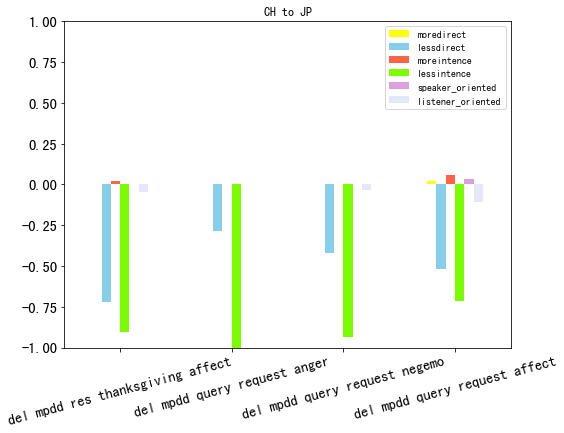

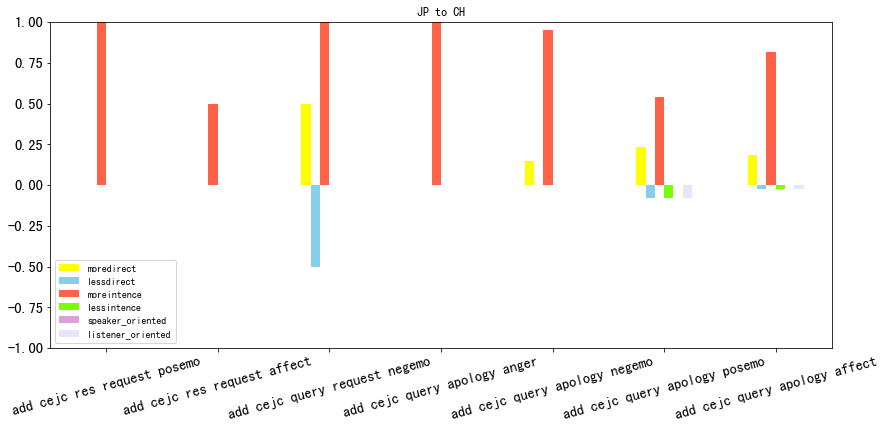

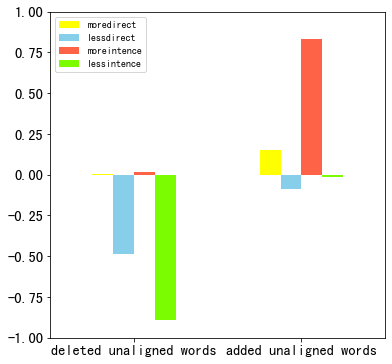

In [38]:
from IPython.display import display
# sorted_sig_list = []
# for i,l in enumerate(sig_list):
#     sorted_sig_list.append([l[0],l[1],l[3],l[2],l[4]])

labeled_table_path = 'CLIWC_diff_reason_table.csv'
columns_name=['diff_type','corpus','situation','sen_type','emotion','word','htmt','line','part','effect','direct','intence','perspective']
df = pd.read_csv(labeled_table_path, names=columns_name)
# REPLACE subordinate concept to MOREorLESS intencity
more =   ['lessdowngrader',
            'moreupgrader',
            'morespecific',
            'lessrespectful',
            'lesshumble',
            'add_expect_sth_in_return',
            'add_irony']
less = ['moredowngrader','lessspecific','lessupgrader','morerespectful','morehumble','rmv_expect_sth_in_return','rmv_irony']
for m, l in zip(more, less):
    df=df.replace(m,'moreintence')
    df=df.replace(l,'lessintence')

norm=False
freq_df = pd.DataFrame()
miss_df = pd.DataFrame()
# for s in sorted_sig_list:
for s in sig_list:
    diff_type=s[0]
    corpus=s[1]
    sen_type=s[2]
    situation=s[3]
    emotion=s[4]
#     diff_type='del'
#     corpus='cejc'
#     sen_type='query'
#     situation='request'
#     emotion='Trust'

    index_name='{} {} {} {} {}'.format(diff_type,corpus,sen_type,situation,emotion)
    emo_cond = df['diff_type'].isin([diff_type]) & df['corpus'].isin([corpus]) & df['sen_type'].isin([sen_type]) & df['situation'].isin([situation]) & df['emotion'].isin([emotion])
    gizamiss_cond = df['part'].isin(['gizamiss','labelmiss'])
    emo_df = df[emo_cond&~gizamiss_cond]
    
    effect_freq = emo_df.groupby(['effect'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    direct_freq = emo_df.groupby(['direct'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    intence_freq = emo_df.groupby(['intence'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    perspective_freq = emo_df.groupby(['perspective'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    tmp_df = effect_freq.join([direct_freq, intence_freq,perspective_freq])
#     NORMALIZE
    tmp_df = tmp_df/emo_df['line'].count()
    norm=True
    
    freq_df=pd.concat([tmp_df, freq_df])
    
    nonrmv_emo_df =df[emo_cond]
    nonrmvmiss_freq = nonrmv_emo_df.groupby(['part'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
# #     NORMALIZE
    nonrmvmiss_freq = nonrmvmiss_freq/nonrmv_emo_df['line'].count()
    norm=True
    
    miss_df=pd.concat([miss_df, nonrmvmiss_freq])

freq_df=freq_df.reindex(columns=['noeffect','effect','noapology','norequest', 'nothanks', 'moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented'])
freq_df=freq_df.fillna(0)
# Less * -1
# print(freq_df[['lessdirect','lessintence','listener_oriented']]*-1)
freq_df[['lessdirect','lessintence','listener_oriented']]=freq_df[['lessdirect','lessintence','listener_oriented']]*-1
# plt.style.use('dark_background')
colorlist=['yellow','skyblue','tomato','lawngreen','plum','lavender']
if norm==True:
    freq_df[-4:][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(8,6),ylim=(-1,1),color=colorlist,fontsize='x-large',rot=15,title="CH to JP")
    freq_df[:-4][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(14,6),ylim=(-1,1),color=colorlist,fontsize='x-large',rot=15,title="JP to CH")
else:
    freq_df[-4:][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(8,6),color=colorlist,fontsize='x-large',rot=15,title="CH to JP")
    freq_df[:-4][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(14,6),color=colorlist,fontsize='x-large',rot=15,title="JP to CH")
    
d = freq_df[-4:][['moredirect','lessdirect','moreintence','lessintence']].mean().to_numpy()
a = freq_df[:-4][['moredirect','lessdirect','moreintence','lessintence']].mean().to_numpy()
# d = d/d.sum(axis=0,keepdims=1)
# a = a/a.sum(axis=0,keepdims=1)
print(d.sum())
print(a.sum())
display(pd.DataFrame([d,a]))
new=pd.DataFrame([d,a], index=["deleted unaligned words","added unaligned words"],columns=['moredirect','lessdirect','moreintence','lessintence'])
new.plot.bar(figsize=(6,6),ylim=(-1,1),color=colorlist,fontsize='x-large',stacked=False,rot=0)

1.0
1.0


,0,1,2,3,4
0,0.033606,0.927968,0.000000,0.038427,0.0
1,0.071429,0.869578,0.058994,0.000000,0.0


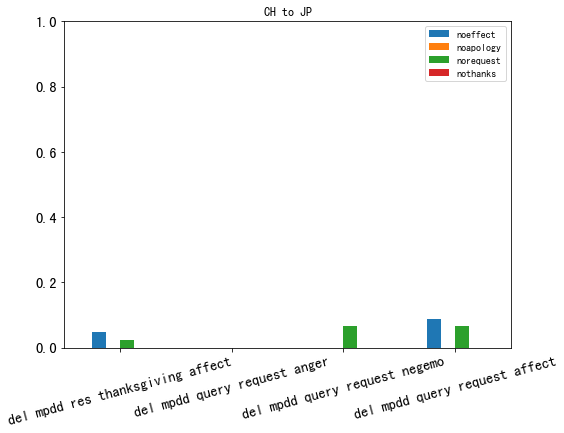

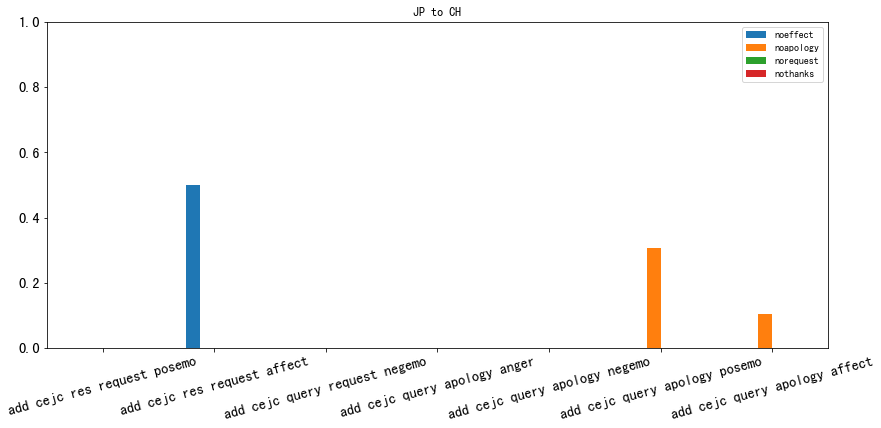

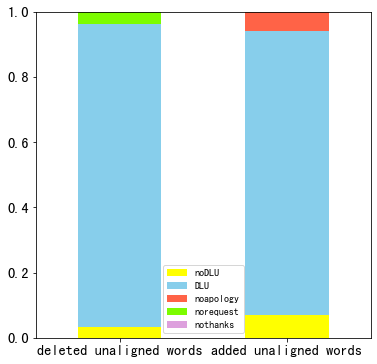

In [39]:
if norm == True:
    freq_df[-4:][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(8,6),ylim=(0,1),fontsize='x-large',rot=15,title="CH to JP")
    freq_df[:-4][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(14,6),ylim=(0,1),fontsize='x-large',rot=15,title="JP to CH")
else:
    freq_df[-4:][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(8,6),fontsize='x-large',rot=15,title="CH to JP")
    freq_df[:-4][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(14,6),fontsize='x-large',rot=15,title="JP to CH")
    
    
d = freq_df[-4:][['noeffect','effect','noapology','norequest', 'nothanks']].mean().to_numpy()
a = freq_df[:-4][['noeffect','effect','noapology','norequest', 'nothanks']].mean().to_numpy()
d = d/d.sum(axis=0,keepdims=1)
a = a/a.sum(axis=0,keepdims=1)
print(d.sum())
print(a.sum())
display(pd.DataFrame([d,a]))
new=pd.DataFrame([d,a], index=["deleted unaligned words","added unaligned words"],columns=['noDLU','DLU','noapology','norequest','nothanks'])
new.plot.bar(figsize=(6,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=0)


,labelmiss,gizamiss,headact,adjunct,other,response,segment
del mpdd query request affect,0.017316,0.588745,0.129870,0.225108,0.038961,0.000000,0.393939
del mpdd query request negemo,0.019417,0.679612,0.126214,0.174757,0.000000,0.000000,0.300971
del mpdd query request anger,0.000000,0.300000,0.300000,0.400000,0.000000,0.000000,0.700000
del mpdd res thanksgiving affect,0.000000,0.522222,0.011111,0.011111,0.022222,0.433333,0.477778
add cejc query apology affect,0.000000,0.641509,0.056604,0.292453,0.009434,0.000000,0.358491
add cejc query apology posemo,0.000000,0.606061,0.121212,0.242424,0.030303,0.000000,0.393939
add cejc query apology negemo,0.000000,0.661017,0.033898,0.305085,0.000000,0.000000,0.338983
add cejc query apology anger,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000
add cejc query request negemo,0.000000,0.833333,0.166667,0.000000,0.000000,0.000000,0.166667
add cejc res request affect,0.000000,0.666667,0.000000,0.166667,0.000000,0.166667,0.333333


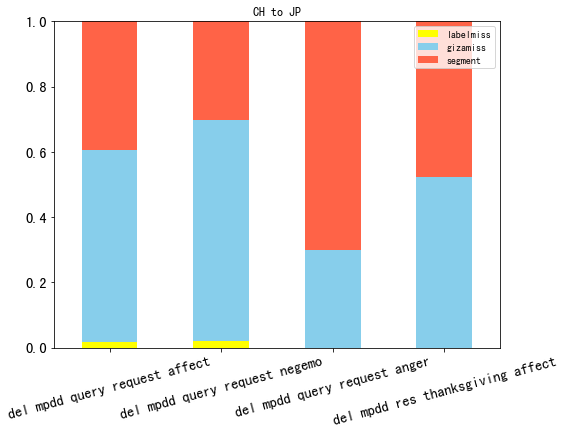

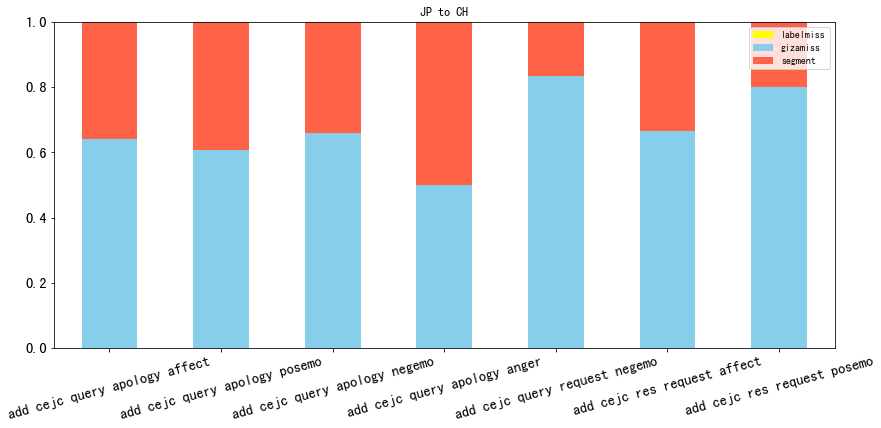

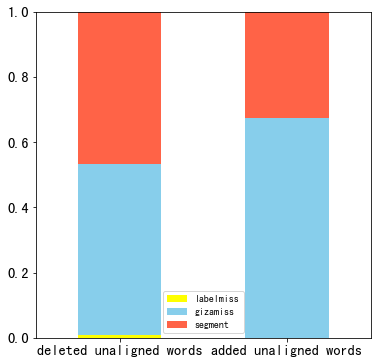

In [41]:
miss_df=miss_df.reindex(columns=segments)
miss_df['segment'] = miss_df['headact']+miss_df['adjunct']+miss_df['other']+miss_df['response']
display(miss_df)
miss_df=miss_df.fillna(0)
if norm == True:
    miss_df[:4][['labelmiss','gizamiss','segment']].plot.bar(figsize=(8,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="CH to JP")
    miss_df[4:][['labelmiss','gizamiss','segment']].plot.bar(figsize=(14,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="JP to CH")
else:
    miss_df[:4][['labelmiss','gizamiss','segment']].plot.bar(figsize=(8,6),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="CH to JP")
    miss_df[4:][['labelmiss','gizamiss','segment']].plot.bar(figsize=(14,6),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="JP to CH")
new=pd.DataFrame([miss_df[:4][['labelmiss','gizamiss','segment']].mean().to_list(),miss_df[4:][['labelmiss','gizamiss','segment']].mean().to_list()], index=["deleted unaligned words","added unaligned words"],columns=['labelmiss','gizamiss','segment'])
new.plot.bar(figsize=(6,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=0)

# show words ranking by freq¶

In [25]:
from IPython.display import display
sorted_sig_list = []
for i,l in enumerate(sig_list):
    sorted_sig_list.append([l[0],l[1],l[3],l[2],l[4]])

labeled_table_path = 'CLIWC_diff_reason_table.csv'
columns_name=['diff_type','corpus','situation','sen_type','emotion','word','htmt','line','part','effect','direct','intence','perspective']
df = pd.read_csv(labeled_table_path, names=columns_name)

# REPLACE subordinate concept to MOREorLESS intencity
more =   ['lessdowngrader',
            'moreupgrader',
            'morespecific',
            'lessrespectful',
            'lesshumble',
            'add_expect_sth_in_return',
            'add_irony']
less = ['moredowngrader','lessspecific','lessupgrader','morerespectful','morehumble','rmv_expect_sth_in_return','rmv_irony']
for m, l in zip(more, less):
    df=df.replace(m,'moreintence')
    df=df.replace(l,'lessintence')
# pd.set_option('display.min_rows', 100)
# print(df)
# pprint(sorted_sig_list)

# for s in sorted_sig_list:
for s in sig_list:
    diff_type=s[0]
    corpus=s[1]
    sen_type=s[2]
    situation=s[3]
    emotion=s[4]
    
    print('#'*50)
    print("######## {} {} {} {} {} ########".format(diff_type,corpus,sen_type,situation,emotion))
    print('#'*50)

    emo_cond = df['diff_type'].isin([diff_type]) & df['corpus'].isin([corpus]) & df['sen_type'].isin([sen_type]) & df['situation'].isin([situation]) & df['emotion'].isin([emotion])
    gizamiss_cond = df['part'].isin(['gizamiss','labelmiss'])
    emo_df = df[emo_cond&~gizamiss_cond]
    emo_df
    word_freq = emo_df.groupby(['word'])['line'].count().sort_values(ascending=False)
    print('[word_freq]')
    print(word_freq)
    print()
#     word_freq = emo_df.groupby(['word','part'])['line'].count().sort_values(ascending=False)
#     print('[word_freq part]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','effect'])['line'].count().sort_values(ascending=False)
#     print('[word_freq effect]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','direct'])['line'].count().sort_values(ascending=False)
#     print('[word_freq direct]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','intence'])['line'].count().sort_values(ascending=False)
#     print('[word_freq intece]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','perspective'])['line'].count().sort_values(ascending=False)
#     print('[word_freq perspective]')
#     print(word_freq)
#     print()


##################################################
######## del mpdd query request affect ########
##################################################
[word_freq]
word
不      11
对      11
想       7
好       6
不要      5
问题      4
可以      4
批评      3
爱       3
放心      3
保证      2
关心      2
哎呀      2
客气      2
感谢      2
麻烦      2
抱歉      1
支持      1
错       1
付出      1
重要      1
信任      1
胆怯      1
原谅      1
受罪      1
肯定      1
神经病     1
大       1
激动      1
清楚      1
欢迎      1
尊重      1
差       1
希望      1
帮忙      1
高       1
最好      1
干       1
Name: line, dtype: int64

##################################################
######## del mpdd query request negemo ########
##################################################
[word_freq]
word
不      9
不要     5
问题     4
批评     3
麻烦     2
错      1
胆怯     1
神经病    1
激动     1
抱歉     1
干      1
差      1
受罪     1
Name: line, dtype: int64

##################################################
######## del mpdd query request anger ########
###################